In [153]:
# This is for GSEA analysis 
## This is only for one time
import gseapy as gp
from gseapy import Biomart
from gseapy import Msigdb
import pandas as pd 
import networkx as nx
msig=Msigdb()
names = gp.get_library_name('Human')
names
# reactome_2022 = gp.get_library(name='Reactome_2022',organism='Human')
# gobp = gp.get_library(name="")

/Users/woochanghwang/miniconda3/envs/quantum/lib/python3.11/site-packages/gseapy/msigdb.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]
/Users/woochanghwang/miniconda3/envs/quantum/lib/python3.11/site-packages/gseapy/msigdb.py:72: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]


['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_Cell

In [109]:
reactome_2022 = gp.get_library(name='Reactome_2022',organism='Human')
gobp_2023 = gp.get_library(name="GO_Biological_Process_2023",organism='Human')

In [5]:
qw_result_df = pd.read_csv("./data/QW_result_20241110_type1.csv")
qw_result_df

,ENSP,coined,contime,rwr,preferred_name
0,ENSP00000005257,0.000274,0.000294,0.000164,RALA
1,ENSP00000451828,0.000422,0.002465,0.001287,AKT1
2,ENSP00000351255,0.000087,0.000193,0.000236,STAT4
3,ENSP00000362680,0.000431,0.001966,0.001226,SRC
4,ENSP00000484855,0.000071,0.000231,0.000087,EXOC5
...,...,...,...,...,...
11242,ENSP00000397249,0.000067,0.000139,0.000003,BZW2
11243,ENSP00000413152,0.000067,0.000139,0.000003,FKBP7
11244,ENSP00000419088,0.000067,0.000139,0.000003,FAM162A
11245,ENSP00000432487,0.000067,0.000139,0.000003,SAAL1


In [6]:
p005_nums = 948

In [31]:
qw_result_df.sort_values(by='rwr', ascending=False, inplace=True)
rwr_sorted = qw_result_df['preferred_name'].dropna().tolist()
rwr_key_proteins = rwr_sorted[:p005_nums]
rwr_key_proteins

['TP53',
 'EGFR',
 'RPS27A',
 'CTNNB1',
 'AKT1',
 'ACTB',
 'SRC',
 'UBA52',
 'TNF',
 'IL6',
 'H3C13',
 'EP300',
 'H4C6',
 'HSP90AA1',
 'UBC',
 'H3C12',
 'MYC',
 'STAT3',
 'CD4',
 'BRCA1',
 'INS',
 'FN1',
 'IL1B',
 'H3-3B',
 'IFNG',
 'FAU',
 'MED1',
 'HSP90AB1',
 'CD44',
 'CALM3',
 'HDAC1',
 'GAPDH',
 'MAPK3',
 'BCL2',
 'UBB',
 'H3-4',
 'CDC42',
 'RHOA',
 'GNB1',
 'RPS18',
 'PRKACA',
 'GRB2',
 'STAT1',
 'CD8A',
 'ALB',
 'PRKACB',
 'IL10',
 'RPS9',
 'RPS6',
 'RPS2',
 'PLK1',
 'RPS3',
 'ESR1',
 'JUN',
 'CALML5',
 'CALML3',
 'RPS11',
 'ERBB2',
 'PRKACG',
 'NFKB1',
 'CDK1',
 'EGF',
 'PTEN',
 'CALML4',
 'MAPK1',
 'RPL5',
 'CALML6',
 'RPS14',
 'POLR2C',
 'GNAQ',
 'EFTUD2',
 'TLR4',
 'CREBBP',
 'MRTO4',
 'HSPA4',
 'CDH1',
 'RPS16',
 'RPS5',
 'RPL23',
 'APP',
 'RPS23',
 'RPL11',
 'CXCL8',
 'RPL4',
 'RACK1',
 'JAK2',
 'CASP3',
 'ITGB1',
 'RPS7',
 'RBX1',
 'IMP3',
 'IL2',
 'KRAS',
 'RPS20',
 'PIK3R1',
 'H3-5',
 'HDAC2',
 'POLR2B',
 'RPL23A',
 'RPL9',
 'RPS13',
 'RPS19',
 'RPLP0',
 'CD74',
 'H3-2'

In [30]:
qw_result_df.sort_values(by='coined', ascending=False, inplace=True)
coined_sorted = qw_result_df['preferred_name'].dropna().tolist()
coined_key_proteins = coined_sorted[:p005_nums]
coined_key_proteins

['ZNF114',
 'CLIP4',
 'TRIM28',
 'CISD3',
 'PPP2R2C',
 'FAU',
 'CISD1',
 'TP53',
 'CDC42',
 'CISD2',
 'COCH',
 'ATP10A',
 'PPHLN1',
 'NOX4',
 'RHOA',
 'CTNNB1',
 'GNB1',
 'PEG10',
 'ATP8A1',
 'APP',
 'EGFR',
 'GNAQ',
 'DLG4',
 'TAPBPL',
 'DPP7',
 'CALR3',
 'CD8A',
 'ZKSCAN4',
 'TMEM126A',
 'SETDB1',
 'AKAP14',
 'RTN4',
 'MINDY3',
 'TOR1A',
 'MYO1E',
 'VDAC1',
 'SHH',
 'BCL2',
 'UHRF2',
 'TASOR',
 'CARD8',
 'PRKN',
 'NPY',
 'PBX4',
 'GNAS',
 'CEP290',
 'AKAP11',
 'ACADM',
 'MR1',
 'RBX1',
 'FURIN',
 'GNAL',
 'HSP90AB1',
 'KCNB1',
 'GNG2',
 'PRKAR2A',
 'PREP',
 'CTAG1B',
 'ACTB',
 'RUNDC3A',
 'MBD3L2',
 'SRC',
 'VASH1',
 'PLK1',
 'GRID2',
 'ISL1',
 'CASP1',
 'SUN1',
 'AKT1',
 'POMC',
 'PHRF1',
 'FN1',
 'FTO',
 'NOS1AP',
 'RTN4IP1',
 'SNRPN',
 'NPFF',
 'HOOK1',
 'MRPL24',
 'HSDL2',
 'SUMF1',
 'DAG1',
 'AASDH',
 'EIF2B3',
 'CALM3',
 'CTSG',
 'RABIF',
 'INS',
 'CRK',
 'PRKACA',
 'RAB6A',
 'CANX',
 'PTS',
 'RAB5A',
 'RAB8A',
 'SDC1',
 'KNG1',
 'PRKACB',
 'PXK',
 'HOXC8',
 'MSC',
 'SUGCT',
 '

In [110]:
covid_new_community = pd.read_csv("./result/covid_new_community/Community_annotations.csv")
covid_new_community


,ENSP,community,HGNC
0,COVID19,3,NaN
1,ENSP00000000233,3,ARF5
2,ENSP00000000412,3,M6PR
3,ENSP00000001008,0,FKBP4
4,ENSP00000001146,5,CYP26B1
...,...,...,...
11242,ENSP00000501135,10,NaN
11243,ENSP00000501150,4,NaN
11244,ENSP00000501245,4,NaN
11245,ENSP00000501254,5,NaN


In [129]:
ensp_hgnc_string_df = pd.read_csv("/Users/woochanghwang/Cardiatec_project_dev/Data/ENSP_HGNC_string.csv")
ensp_hgnc_string_df

,ENSP,HGNC
0,ENSP00000000233,ARF5
1,ENSP00000000412,M6PR
2,ENSP00000001008,FKBP4
3,ENSP00000001146,CYP26B1
4,ENSP00000002125,NDUFAF7
...,...,...
19561,ENSP00000485671,ENSG00000280273
19562,ENSP00000485672,ENSG00000279458
19563,ENSP00000485673,ENSG00000279988
19564,ENSP00000485675,ENSG00000280116


In [131]:
covid_new_community = covid_new_community.merge(ensp_hgnc_string_df,
                                                left_on='ENSP',right_on='ENSP',how='left')
# covid_new_community = covid_new_community.dropna()
covid_new_community

,ENSP,community,HGNC_x,HGNC_y
0,COVID19,3,NaN,NaN
1,ENSP00000000233,3,ARF5,ARF5
2,ENSP00000000412,3,M6PR,M6PR
3,ENSP00000001008,0,FKBP4,FKBP4
4,ENSP00000001146,5,CYP26B1,CYP26B1
...,...,...,...,...
11242,ENSP00000501135,10,NaN,NaN
11243,ENSP00000501150,4,NaN,NaN
11244,ENSP00000501245,4,NaN,NaN
11245,ENSP00000501254,5,NaN,NaN


In [64]:
# covid_new_community=covid_new_community.dropna()
# covid_new_community

In [71]:
covid_new_community_4 = covid_new_community[covid_new_community['community']==4]
covid_new_community_4 = covid_new_community_4.dropna()
covid_new_community_4_list = covid_new_community_4['HGNC'].tolist()
covid_new_community_4_list

['BAIAP2L1',
 'SKAP2',
 'CX3CL1',
 'YBX2',
 'PGLYRP1',
 'RANBP9',
 'CD4',
 'CDH17',
 'MYOC',
 'RTN4R',
 'LCP2',
 'DCN',
 'TNFRSF17',
 'ARHGEF5',
 'PKP2',
 'CD22',
 'ICAM3',
 'CEACAM1',
 'FSTL3',
 'EPHA8',
 'KRT14',
 'KRT20',
 'FGF4',
 'NGFR',
 'NTN1',
 'PTPN18',
 'TBX21',
 'FGF20',
 'CPB2',
 'TSPAN32',
 'CLIC5',
 'PLOD1',
 'PILRA',
 'ITGB4',
 'CETP',
 'LAG3',
 'CHRD',
 'EFNB1',
 'GLG1',
 'APOH',
 'TGM1',
 'VCL',
 'TGFBR3',
 'EFNA2',
 'FGF22',
 'MADCAM1',
 'SERPIND1',
 'MMP11',
 'OSM',
 'PDXP',
 'LGALS1',
 'MYH9',
 'IL2RB',
 'NID2',
 'CTSG',
 'GZMH',
 'GZMB',
 'SOS2',
 'PLEK2',
 'PROCR',
 'FERMT1',
 'LBP',
 'CST4',
 'F9',
 'TIMP1',
 'OLFM4',
 'MMP2',
 'CORO1A',
 'CCL22',
 'CCL17',
 'MMP15',
 'ARHGDIG',
 'CSK',
 'CTSH',
 'PAG1',
 'PLAT',
 'CKM',
 'AMH',
 'RETN',
 'CLC',
 'EBI3',
 'APLP1',
 'TGFB1',
 'CD79A',
 'NKG7',
 'CEACAM5',
 'EPOR',
 'PIK3R2',
 'COMP',
 'PON1',
 'HGF',
 'LAMB1',
 'CPA4',
 'ITGB8',
 'HOXA2',
 'PDAP1',
 'WASL',
 'PCOLCE',
 'SERPINE1',
 'PLOD3',
 'MYL10',
 'MEST',
 'MY

In [154]:

import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

In [ ]:
from gprofiler import GProfiler
'''
 require
 pip install gprofiler-official
'''


def Functional_profiling(gene_list,
                         organism='hsapiens',
                         sources=["GO:MF","GO:CC","GO:BP","KEGG","REAC","WP","TF","MIRNA","HPA","CORUM","HP"],
                         user_threshold=0.05,
                         significance_threshold_method = 'g_SCS'):
    gp = GProfiler(return_dataframe=True)

    gp_result_df = gp.profile(query=gene_list,organism=organism, user_threshold=user_threshold, significance_threshold_method=significance_threshold_method ,no_iea=True, sources=sources, no_evidences=False)

    return gp_result_df


In [73]:
def create_venn3_from_dict(data_dict, labels=None, title=None, label_size=16):
    """
    Create a three-set Venn diagram from a dictionary of sets with larger labels.
    
    Parameters:
    data_dict (dict): Dictionary with three sets to compare
    labels (list): Optional list of three labels for the sets
    title (str): Optional title for the diagram
    label_size (int): Font size for set labels (default: 16)
    """
    # Convert dictionary values to sets if they aren't already
    sets = [set(val) if not isinstance(val, set) else val 
            for val in data_dict.values()]
    
    if len(sets) != 3:
        raise ValueError("Exactly three sets are required for a three-set Venn diagram")

    # Calculate the sizes of all regions
    s1, s2, s3 = sets
    subsets = [
        len(s1 - s2 - s3),                  # Abc
        len(s2 - s1 - s3),                  # aBc
        len(s1 & s2 - s3),                  # ABc
        len(s3 - s1 - s2),                  # abC
        len(s1 & s3 - s2),                  # AbC
        len(s2 & s3 - s1),                  # aBC
        len(s1 & s2 & s3)                   # ABC
    ]
    
    # Use dictionary keys as labels if none provided
    if labels is None:
        labels = list(data_dict.keys())
    
    # Create the Venn diagram
    plt.figure(figsize=(10, 10))
    
    # Set font properties for larger labels
    # v = venn3(subsets=subsets, set_labels=labels, 
    #           set_colors=('lightblue', 'lightgreen', 'lightpink'))
    v = venn3(subsets=subsets, set_labels=labels)

    
    # Increase font size for set labels
    for text in v.set_labels:
        if text is not None:
            text.set_fontsize(label_size)
    
    # Increase font size for subset labels
    for text in v.subset_labels:
        if text is not None:
            text.set_fontsize(label_size-2)  # Slightly smaller than set labels
    
    if title:
        plt.title(title, fontsize=label_size+2)  # Title slightly larger than labels
    
    return plt

In [74]:
# covid_new_com4_REAC_ORA_df = Functional_profiling(covid_new_community_4_list,sources=['REAC'])
# covid_new_com4_REAC_ORA_df.to_csv("/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/community4_reac_ora.csv")

In [69]:
# covid_new_com4_REAC_ORA_df['Reactome_ID'] = covid_new_com4_REAC_ORA_df['native'].str.split(':').str[1]
# covid_new_com4_REAC_ORA_paths = covid_new_com4_REAC_ORA_df['Reactome_ID'].tolist()
# covid_new_com4_REAC_ORA_paths

['R-HSA-1474244',
 'R-HSA-168256',
 'R-HSA-1280215',
 'R-HSA-9006934',
 'R-HSA-216083',
 'R-HSA-3000178',
 'R-HSA-449147',
 'R-HSA-1474228',
 'R-HSA-380108',
 'R-HSA-1474290',
 'R-HSA-422475',
 'R-HSA-9675108',
 'R-HSA-168249',
 'R-HSA-3000171',
 'R-HSA-1442490',
 'R-HSA-109582',
 'R-HSA-2022090',
 'R-HSA-186797',
 'R-HSA-2219530',
 'R-HSA-381426',
 'R-HSA-6783783',
 'R-HSA-76002',
 'R-HSA-2682334',
 'R-HSA-114608',
 'R-HSA-162582',
 'R-HSA-1650814',
 'R-HSA-76005',
 'R-HSA-6785807',
 'R-HSA-198933',
 'R-HSA-140877',
 'R-HSA-6811558',
 'R-HSA-1266738',
 'R-HSA-8948216',
 'R-HSA-1500931',
 'R-HSA-373755',
 'R-HSA-1566948',
 'R-HSA-8957275',
 'R-HSA-199418',
 'R-HSA-202733',
 'R-HSA-2219528',
 'R-HSA-6798695',
 'R-HSA-3928663',
 'R-HSA-2129379',
 'R-HSA-3000157',
 'R-HSA-8874081',
 'R-HSA-6806834',
 'R-HSA-451927',
 'R-HSA-1592389',
 'R-HSA-8875878',
 'R-HSA-9012999',
 'R-HSA-3000170',
 'R-HSA-5663213',
 'R-HSA-3928662',
 'R-HSA-446728',
 'R-HSA-140837',
 'R-HSA-9013149',
 'R-HSA-194138'

In [94]:
covid_new_community_10 = covid_new_community[covid_new_community['community']==10]
covid_new_community_10 = covid_new_community_10.dropna()
covid_new_community_10_list = covid_new_community_10['HGNC'].tolist()
# covid_new_com10_REAC_ORA_df = Functional_profiling(covid_new_community_10_list,sources=['REAC'])
# covid_new_com10_REAC_ORA_df.to_csv("/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/community10_reac_ora.csv")

In [22]:
# covid_new_com10_REAC_ORA_df['Reactome_ID'] = covid_new_com10_REAC_ORA_df['native'].str.split(':').str[1]
# covid_new_com10_REAC_ORA_paths = covid_new_com10_REAC_ORA_df['Reactome_ID'].tolist()
# covid_new_com10_REAC_ORA_paths

['R-HSA-388396',
 'R-HSA-372790',
 'R-HSA-162582',
 'R-HSA-500792',
 'R-HSA-416476',
 'R-HSA-373076',
 'R-HSA-418594',
 'R-HSA-112316',
 'R-HSA-418555',
 'R-HSA-112314',
 'R-HSA-112315',
 'R-HSA-168164',
 'R-HSA-5576891',
 'R-HSA-166166',
 'R-HSA-937061',
 'R-HSA-375276',
 'R-HSA-111885',
 'R-HSA-1296071',
 'R-HSA-168138',
 'R-HSA-166016',
 'R-HSA-168898',
 'R-HSA-975155',
 'R-HSA-418346',
 'R-HSA-168181',
 'R-HSA-975138',
 'R-HSA-975871',
 'R-HSA-168176',
 'R-HSA-168142',
 'R-HSA-422356',
 'R-HSA-450294',
 'R-HSA-181438',
 'R-HSA-168179',
 'R-HSA-166058',
 'R-HSA-168188',
 'R-HSA-163685',
 'R-HSA-448424',
 'R-HSA-397014',
 'R-HSA-5578775',
 'R-HSA-381676',
 'R-HSA-168643',
 'R-HSA-420092',
 'R-HSA-456926',
 'R-HSA-442755',
 'R-HSA-977443',
 'R-HSA-198725',
 'R-HSA-5675221',
 'R-HSA-1296065',
 'R-HSA-187037',
 'R-HSA-109606',
 'R-HSA-1296072',
 'R-HSA-168638',
 'R-HSA-418360',
 'R-HSA-6794361',
 'R-HSA-1296059',
 'R-HSA-997272',
 'R-HSA-1296041',
 'R-HSA-166520',
 'R-HSA-112040',
 'R-H

In [95]:
covid_new_community_5 = covid_new_community[covid_new_community['community']==5]
covid_new_community_5 = covid_new_community_5.dropna()
covid_new_community_5_list = covid_new_community_5['HGNC'].tolist()
# covid_new_com5_REAC_ORA_df = Functional_profiling(covid_new_community_5_list,sources=['REAC'])
# # covid_new_com5_REAC_ORA_df
# covid_new_com5_REAC_ORA_df.to_csv("/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/community5_reac_ora.csv")

In [24]:
# covid_new_com5_REAC_ORA_df['Reactome_ID'] = covid_new_com5_REAC_ORA_df['native'].str.split(':').str[1]
# covid_new_com5_REAC_ORA_paths = covid_new_com5_REAC_ORA_df['Reactome_ID'].tolist()
# covid_new_com5_REAC_ORA_paths

['R-HSA-1430728',
 'R-HSA-556833',
 'R-HSA-211859',
 'R-HSA-15869',
 'R-HSA-8978868',
 'R-HSA-156580',
 'R-HSA-9748784',
 'R-HSA-211945',
 'R-HSA-71291',
 'R-HSA-196854',
 'R-HSA-1483206',
 'R-HSA-8957322',
 'R-HSA-196849',
 'R-HSA-211897',
 'R-HSA-1483257',
 'R-HSA-9033241',
 'R-HSA-428157',
 'R-HSA-389661',
 'R-HSA-8956319',
 'R-HSA-156590',
 'R-HSA-2142753',
 'R-HSA-71406',
 'R-HSA-71387',
 'R-HSA-1483166',
 'R-HSA-1482788',
 'R-HSA-191273',
 'R-HSA-1482925',
 'R-HSA-5668914',
 'R-HSA-9609507',
 'R-HSA-499943',
 'R-HSA-156588',
 'R-HSA-5362517',
 'R-HSA-9749641',
 'R-HSA-5579029',
 'R-HSA-70895',
 'R-HSA-8963743',
 'R-HSA-194068',
 'R-HSA-1482839',
 'R-HSA-1482801',
 'R-HSA-9753281',
 'R-HSA-193368',
 'R-HSA-8956321',
 'R-HSA-2187338',
 'R-HSA-5663084',
 'R-HSA-70268',
 'R-HSA-1660662',
 'R-HSA-71336',
 'R-HSA-70326',
 'R-HSA-193775',
 'R-HSA-74259',
 'R-HSA-8956320',
 'R-HSA-70263',
 'R-HSA-192105',
 'R-HSA-77289',
 'R-HSA-8935690',
 'R-HSA-1482922',
 'R-HSA-211935',
 'R-HSA-629594

In [114]:
biomarkers = pd.read_excel("/Users/woochanghwang/Cardiatec_project_dev/Quantum/Biomarker_list.xlsx")
DEP_6M_long_severe = biomarkers['DEP_6M_long+severe'].dropna().tolist()

In [96]:
########## Community 4
rwr_key_comm4 = list(set(rwr_key_proteins)&set(covid_new_community_4_list))
coined_key_comm4 = list(set(coined_key_proteins)&set(covid_new_community_4_list))
DEP_6M_comm4 = list(set(DEP_6M_long_severe)&set(covid_new_community_4_list))

In [97]:
rwr_key_comm4_REAC_ORA_df = Functional_profiling(rwr_key_comm4,sources=['REAC'])
rwr_key_comm4_REAC_ORA_df
rwr_key_comm4_REAC_ORA_df.to_csv("/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/rwr_p005_comm4_reac_ora.csv")

In [98]:
rwr_key_comm4_REAC_ORA_df['Reactome_ID'] = rwr_key_comm4_REAC_ORA_df['native'].str.split(':').str[1]
rwr_key_comm4_REAC_ORA_paths = rwr_key_comm4_REAC_ORA_df['Reactome_ID'].tolist()

In [99]:
coined_key_comm4_REAC_ORA_df = Functional_profiling(coined_key_comm4,sources=['REAC'])
coined_key_comm4_REAC_ORA_df
coined_key_comm4_REAC_ORA_df.to_csv(("/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/coined_qw_p005_comm4_reac_ora.csv"))

In [100]:
coined_key_comm4_REAC_ORA_df['Reactome_ID'] = coined_key_comm4_REAC_ORA_df['native'].str.split(':').str[1]
coined_key_comm4_REAC_ORA_paths = coined_key_comm4_REAC_ORA_df['Reactome_ID'].tolist()

In [101]:
DEP_6M_comm4_REAC_ORA_df = Functional_profiling(DEP_6M_comm4, sources=['REAC'])
DEP_6M_comm4_REAC_ORA_df
DEP_6M_comm4_REAC_ORA_df.to_csv(
    "/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/DEP_6M_comm4_reac_ora.csv")


In [102]:
DEP_6M_comm4_REAC_ORA_df['Reactome_ID'] = DEP_6M_comm4_REAC_ORA_df['native'].str.split(':').str[1]
DEP_6M_comm4_REAC_ORA_paths = DEP_6M_comm4_REAC_ORA_df['Reactome_ID'].tolist()

In [103]:
sig_path_all = dict()
sig_path_all['RWR_Comm4'] = rwr_key_comm4_REAC_ORA_paths
sig_path_all['coined_Comm4'] = coined_key_comm4_REAC_ORA_paths
sig_path_all['DEP_6M_Comm4'] = DEP_6M_comm4_REAC_ORA_paths

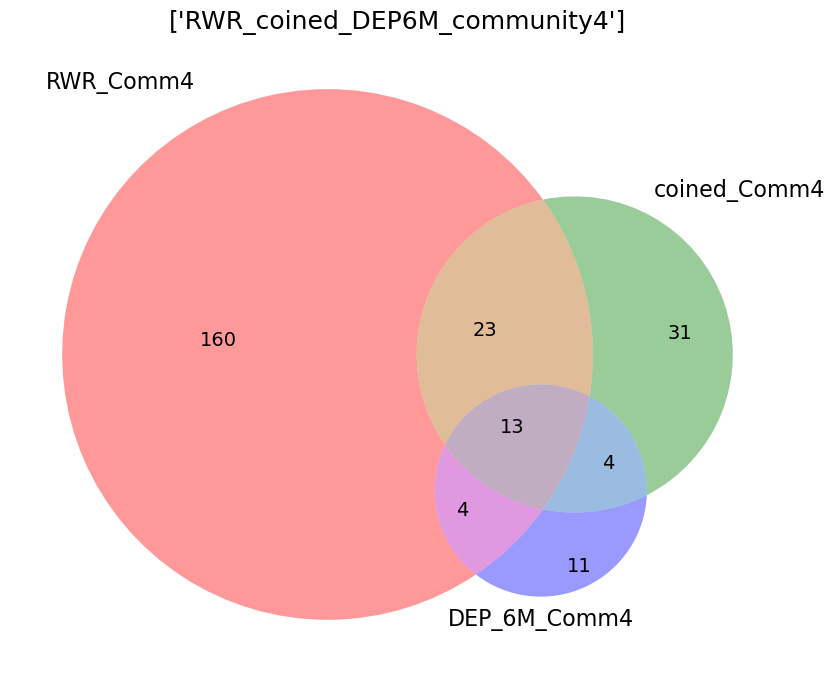

In [104]:
title = ["RWR_coined_DEP6M_community4"]
plt = create_venn3_from_dict(
            sig_path_all,
            title=title
        )
fig_save_addr=f"/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/Fig/ora_{title}.png"
plt.savefig(fig_save_addr)
plt.show()

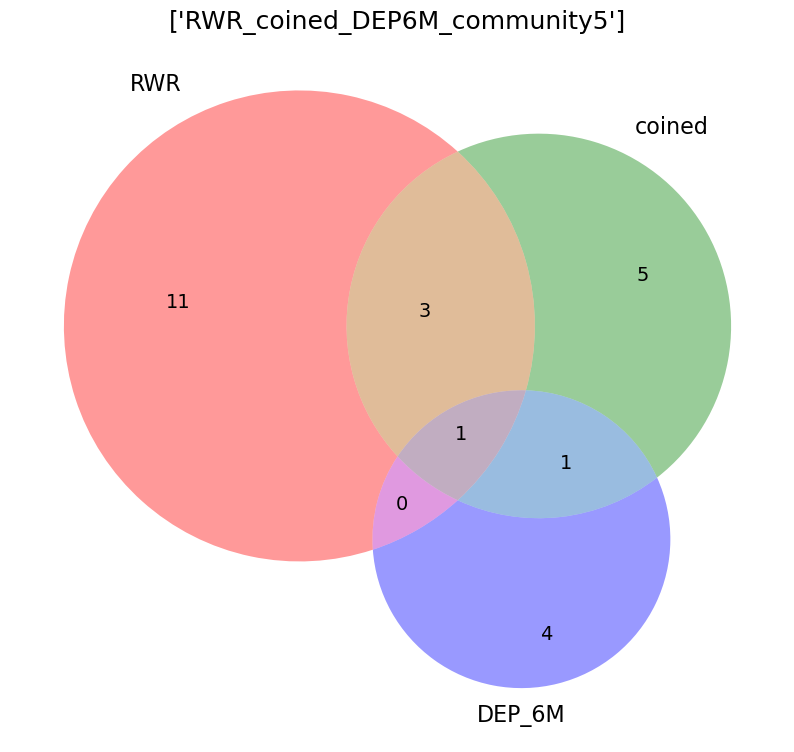

In [106]:
########## Community 5
rwr_key_comm = list(set(rwr_key_proteins) & set(covid_new_community_5_list))
coined_key_comm = list(set(coined_key_proteins) & set(covid_new_community_5_list))
DEP_6M_comm = list(set(DEP_6M_long_severe) & set(covid_new_community_5_list))
rwr_key_comm_REAC_ORA_df = Functional_profiling(rwr_key_comm, sources=['REAC'])
rwr_key_comm_REAC_ORA_df
rwr_key_comm_REAC_ORA_df.to_csv(
    "/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/rwr_p005_comm5_reac_ora.csv")
rwr_key_comm_REAC_ORA_df['Reactome_ID'] = rwr_key_comm_REAC_ORA_df['native'].str.split(':').str[1]
rwr_key_comm_REAC_ORA_paths = rwr_key_comm_REAC_ORA_df['Reactome_ID'].tolist()
coined_key_comm_REAC_ORA_df = Functional_profiling(coined_key_comm, sources=['REAC'])
coined_key_comm_REAC_ORA_df
coined_key_comm_REAC_ORA_df.to_csv(
    ("/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/coined_qw_p005_comm5_reac_ora.csv"))
coined_key_comm_REAC_ORA_df['Reactome_ID'] = coined_key_comm_REAC_ORA_df['native'].str.split(':').str[1]
coined_key_comm_REAC_ORA_paths = coined_key_comm_REAC_ORA_df['Reactome_ID'].tolist()
DEP_6M_comm_REAC_ORA_df = Functional_profiling(DEP_6M_comm, sources=['REAC'])
DEP_6M_comm_REAC_ORA_df
DEP_6M_comm_REAC_ORA_df.to_csv(
    "/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/DEP_6M_comm5_reac_ora.csv")

DEP_6M_comm_REAC_ORA_df['Reactome_ID'] = DEP_6M_comm_REAC_ORA_df['native'].str.split(':').str[1]
DEP_6M_comm_REAC_ORA_paths = DEP_6M_comm_REAC_ORA_df['Reactome_ID'].tolist()
sig_path_all = dict()
sig_path_all['RWR'] = rwr_key_comm_REAC_ORA_paths
sig_path_all['coined'] = coined_key_comm_REAC_ORA_paths
sig_path_all['DEP_6M'] = DEP_6M_comm_REAC_ORA_paths
title = ["RWR_coined_DEP6M_community5"]
plt = create_venn3_from_dict(
    sig_path_all,
    title=title
)
fig_save_addr = f"/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/Fig/ora_{title}.png"
plt.savefig(fig_save_addr)
plt.show()

/Users/woochanghwang/miniconda3/envs/quantum/lib/python3.11/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


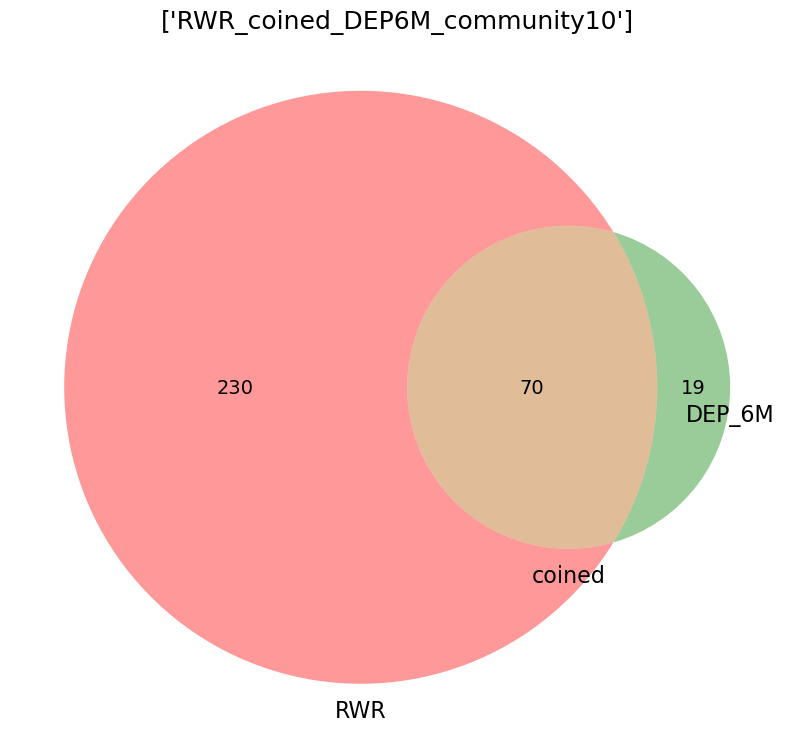

In [107]:
########## Community 10
rwr_key_comm = list(set(rwr_key_proteins) & set(covid_new_community_10_list))
coined_key_comm = list(set(coined_key_proteins) & set(covid_new_community_10_list))
DEP_6M_comm = list(set(DEP_6M_long_severe) & set(covid_new_community_10_list))
rwr_key_comm_REAC_ORA_df = Functional_profiling(rwr_key_comm, sources=['REAC'])
rwr_key_comm_REAC_ORA_df
rwr_key_comm_REAC_ORA_df.to_csv(
    "/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/rwr_p005_comm10_reac_ora.csv")
rwr_key_comm_REAC_ORA_df['Reactome_ID'] = rwr_key_comm_REAC_ORA_df['native'].str.split(':').str[1]
rwr_key_comm_REAC_ORA_paths = rwr_key_comm_REAC_ORA_df['Reactome_ID'].tolist()

coined_key_comm_REAC_ORA_df = Functional_profiling(coined_key_comm, sources=['REAC'])
coined_key_comm_REAC_ORA_df
coined_key_comm_REAC_ORA_df.to_csv(
    ("/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/coined_qw_p005_comm10_reac_ora.csv"))
coined_key_comm_REAC_ORA_df['Reactome_ID'] = coined_key_comm_REAC_ORA_df['native'].str.split(':').str[1]
coined_key_comm_REAC_ORA_paths = coined_key_comm_REAC_ORA_df['Reactome_ID'].tolist()

DEP_6M_comm_REAC_ORA_df = Functional_profiling(DEP_6M_comm, sources=['REAC'])
DEP_6M_comm_REAC_ORA_df
DEP_6M_comm_REAC_ORA_df.to_csv(
    "/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/DEP_6M_comm10_reac_ora.csv")
DEP_6M_comm_REAC_ORA_df['Reactome_ID'] = DEP_6M_comm_REAC_ORA_df['native'].str.split(':').str[1]
DEP_6M_comm_REAC_ORA_paths = DEP_6M_comm_REAC_ORA_df['Reactome_ID'].tolist()

sig_path_all = dict()
sig_path_all['RWR'] = rwr_key_comm_REAC_ORA_paths
sig_path_all['coined'] = coined_key_comm_REAC_ORA_paths
sig_path_all['DEP_6M'] = DEP_6M_comm_REAC_ORA_paths
title = ["RWR_coined_DEP6M_community10"]
plt = create_venn3_from_dict(
    sig_path_all,
    title=title
)
fig_save_addr = f"/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/Fig/ora_{title}.png"
plt.savefig(fig_save_addr)
plt.show()

In [93]:
DEP_6M_comm = list(set(DEP_6M_long_severe) & set(covid_new_community_10_list))
dep_6m_comm10 = pd.DataFrame(DEP_6M_comm)
dep_6m_comm10.to_csv("/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/dep_6m_comm10_only.csv")

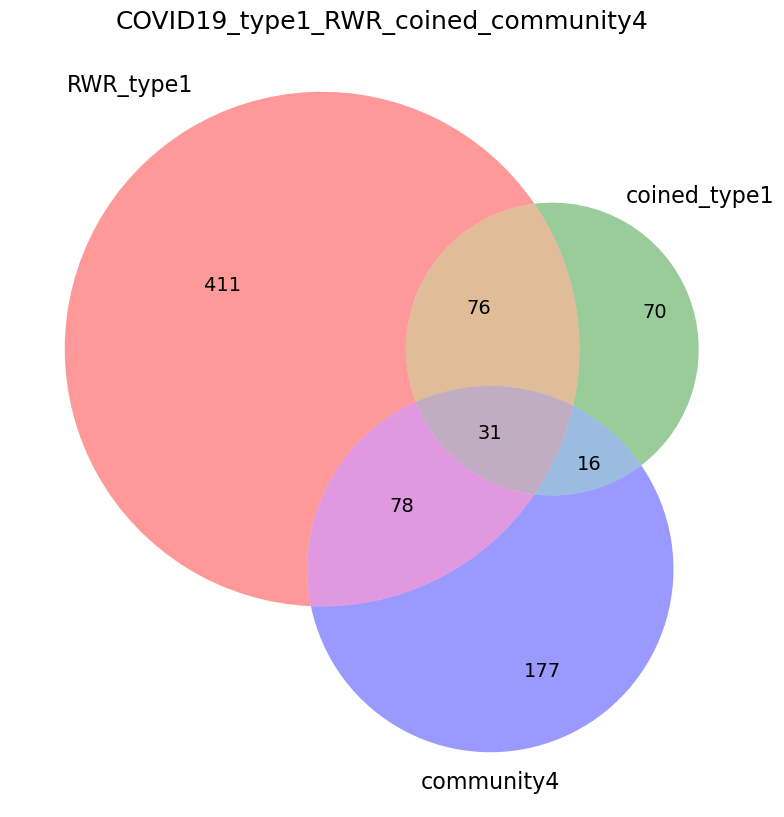

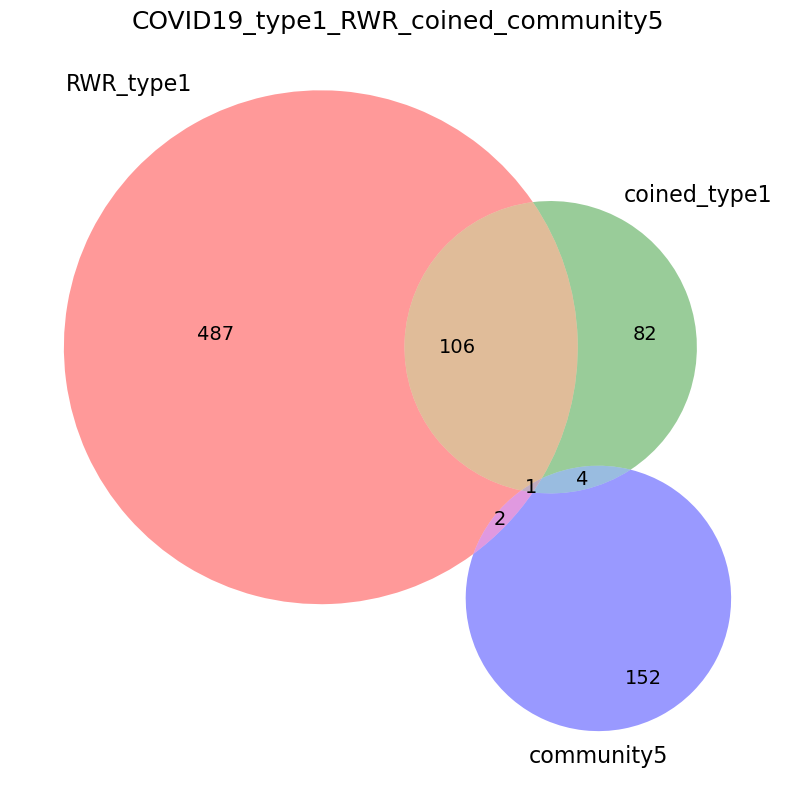

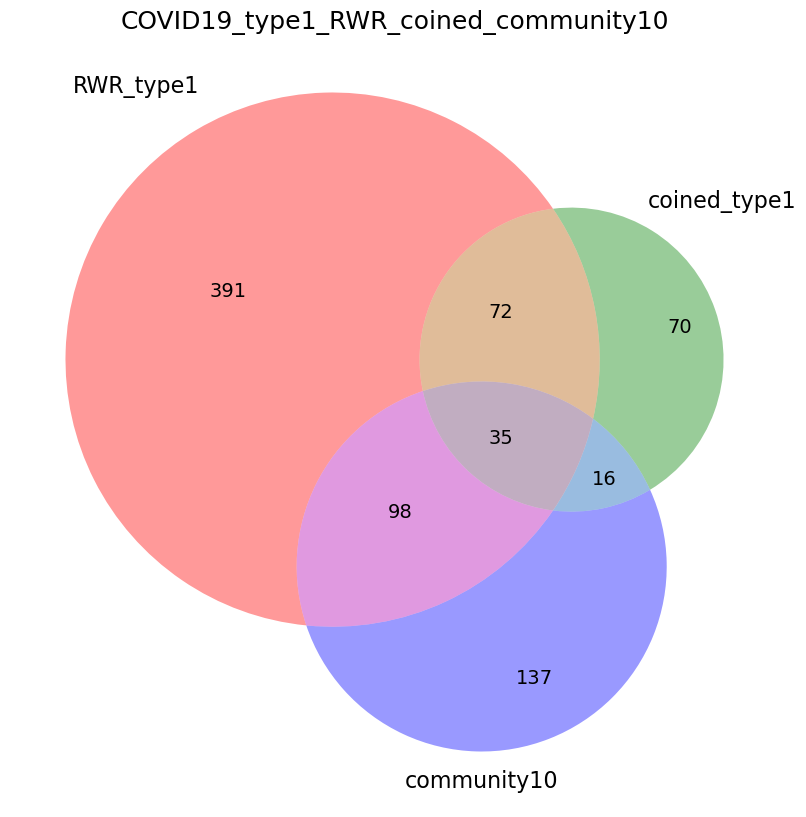

In [43]:
# ora_type_list_all = [
# 
#     ['RWR_type1','coined_type1','community4'],
#     ['RWR_type1','coined_type1','community5'],
#     ['RWR_type1','coined_type1','community10'],
#     
# ]
# 
# title_list = [
# 
#     "COVID19_type1_RWR_coined_community4",
#     "COVID19_type1_RWR_coined_community5",
#     "COVID19_type1_RWR_coined_community10"
# ]
# 
# 
# for ora_type_list, title in zip(ora_type_list_all, title_list):
#     
#     sig_path_all = get_venn_input_data(ora_type_list)
# 
#     plt = create_venn3_from_dict(
#             sig_path_all,
#             title=title
#         )
#     # fig_save_addr=f"/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/Fig/{title}_241104.png"
#     # fig_save_addr=f"/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/Fig/{title}_community4.png"
#     fig_save_addr=f"/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/Fig/ora_{title}.png"
#     # fig_save_addr=f"/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/Fig/{title}_community5.png"
#     # fig_save_addr=f"/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/Fig/{title}_curated.png"
#     plt.savefig(fig_save_addr)
#     plt.show()

In [112]:
############################
# to make fine list for ora of DEP
############################
biomarkers

,rwr_top237,rwr_top237_score,qw_top237,qw_top237_score,DNAm_study1,DNAm_study2,DEP_acute_long+severe,DEP_6M_long+severe,DEP_acute_long_only,DEP_6M_long_only
0,PRKACA,0.001045,POLR2A,0.002849,ZNF717,GLUD1,KCNAB2,RAF1,DNAJC16,SPDEF
1,TP53,0.000994,JUN,0.002811,FANK1,ATP1A3,CBFB,OCRL,SCIMP,ANTXR1
2,RHOA,0.000919,CDKN2A,0.002740,ANKRD36C,RNASEH2C,FOXM1,DLD,MPZ,CD200R1
3,AKT1,0.000896,HSPA8,0.002277,GXYLT1,SMAD2,BRD2,EIF2B1,PODXL2,TINF2
4,INS,0.000848,TP53BP1,0.002249,FRG2C,TNIP1,EIF2B1,FAIM,TMED2,ZPBP2
...,...,...,...,...,...,...,...,...,...,...
1330,NaN,NaN,NaN,NaN,NaN,NaN,ASGR2,NaN,NaN,NaN
1331,NaN,NaN,NaN,NaN,NaN,NaN,FCAMR,NaN,NaN,NaN
1332,NaN,NaN,NaN,NaN,NaN,NaN,SMAD1,NaN,NaN,NaN
1333,NaN,NaN,NaN,NaN,NaN,NaN,TFAM,NaN,NaN,NaN


In [147]:
# DEP_6M_long_severe = biomarkers['DEP_6M_long+severe'].dropna().tolist()
DEP_6M_long_severe = pd.read_csv("./data/dep_6m_long_severe.tsv",sep='\t')['#node'].tolist()

In [148]:
# DEP_acute_long_severe = biomarkers['DEP_acute_long+severe'].dropna().tolist()
DEP_acute_long_severe = pd.read_csv("./data/dep_6m_acute_long_severe.tsv",sep='\t')['#node'].tolist()

In [149]:
DEP_6M_only = list(set(DEP_6M_long_severe) - set(DEP_acute_long_severe))

In [150]:
nodes_in_network = covid_new_community['HGNC_x'].tolist()

In [151]:
DEP_6M_long_severe_In_network = list(set(DEP_6M_long_severe) & set(nodes_in_network))
DEP_acute_long_severe_In_network = list(set(DEP_acute_long_severe) & set(nodes_in_network))
DEP_6M_only_In_network = list(set(DEP_6M_only) & set(nodes_in_network))

In [152]:
set(DEP_6M_long_severe) - set(nodes_in_network) 

{'AARSD1',
 'ABRAXAS2',
 'ADGRE5',
 'AHSG',
 'ASNS',
 'BCL2L1',
 'C1QTNF9',
 'C1orf162',
 'C22orf23',
 'C2orf73',
 'C8G',
 'CAB39L',
 'CBARP',
 'CCDC126',
 'CCL16',
 'CCL3L1',
 'CCN5',
 'CD200R1L',
 'CD59',
 'CDH23',
 'CEP76',
 'CFI',
 'CHEK1',
 'CIRBP',
 'CNN2',
 'CPM',
 'CPNE7',
 'CRYGC',
 'CRYGS',
 'CSRP2',
 'CTNNB1',
 'CTSV',
 'DAXX',
 'DBI',
 'DDX19B',
 'DNALI1',
 'DPEP2',
 'EFNB2',
 'EGFL6',
 'EMILIN3',
 'ENPP5',
 'FAIM',
 'FAM151A',
 'FAM3D',
 'FGA',
 'FGFBP3',
 'FXN',
 'GABARAPL1',
 'GAL3ST1',
 'GALNT11',
 'GFAP',
 'GPR107',
 'HBQ1',
 'HS6ST3',
 'ICOSLG',
 'IGDCC4',
 'IGFL3',
 'ISOC1',
 'IVD',
 'JAKMIP3',
 'JPT1',
 'KBTBD11',
 'KCTD6',
 'KLK12',
 'KLK7',
 'KMT5C',
 'KNG1',
 'LACC1',
 'LACTB2',
 'LCK',
 'LHB',
 'LMO3',
 'LPO',
 'LRRC74A',
 'LTO1',
 'MDGA2',
 'MDP1',
 'METTL24',
 'MPC1',
 'MSR1',
 'MYOM3',
 'NECTIN1',
 'NOTCH1',
 'NPNT',
 'NRN1L',
 'NT5DC3',
 'PAK5',
 'PAPLN',
 'PGRMC2',
 'PIK3CG',
 'PIN4',
 'PLXDC2',
 'POLR1C',
 'POTEG',
 'PPP3R2',
 'PRG3',
 'PSMC3IP',
 'PTGR1',

In [123]:
nodes_in_network

['ARF5',
 'M6PR',
 'FKBP4',
 'CYP26B1',
 'NDUFAF7',
 'HS3ST1',
 'CFTR',
 'CYP51A1',
 'USP28',
 'PDK4',
 'USH1C',
 'RALA',
 'BAIAP2L1',
 'CACNG3',
 'TMEM132A',
 'DVL2',
 'RPAP3',
 'SKAP2',
 'CX3CL1',
 'SPATA20',
 'TSR3',
 'YBX2',
 'CRY1',
 'PGLYRP1',
 'STARD3NL',
 'CAMK1G',
 'CD74',
 'CPA1',
 'RANBP9',
 'CD4',
 'QPCTL',
 'PPP5C',
 'ERCC1',
 'COX15',
 'RGPD5',
 'XYLT2',
 'SCTR',
 'RTFDC1',
 'RB1CC1',
 'AKAP11',
 'PIGQ',
 'CDH17',
 'B4GALT7',
 'CHPF2',
 'GABARAPL2',
 'MYOC',
 'OTC',
 'HOXC8',
 'MRI1',
 'TARBP1',
 'RTN4R',
 'PSMA4',
 'LCP2',
 'DCN',
 'TNFRSF17',
 'MRPS10',
 'GRN',
 'VAMP3',
 'UTS2',
 'RCN1',
 'RFC2',
 'ARHGEF5',
 'NFE2L3',
 'TLL1',
 'CLDN11',
 'RELT',
 'PKP2',
 'INPP4A',
 'SLC2A3',
 'GNA11',
 'CREB3L3',
 'HDAC7',
 'MRPS35',
 'APPBP2',
 'CD22',
 'KCNQ1',
 'TRPM5',
 'OTUD5',
 'GPKOW',
 'AQR',
 'ST6GALNAC1',
 'PSMC4',
 'ACAP1',
 'DERL2',
 'NOX3',
 'KDM4B',
 'ICAM3',
 'CTTNBP2',
 'ACTL6B',
 'KIF22',
 'CEACAM1',
 'YTHDC2',
 'TNFRSF1A',
 'GOLGA5',
 'PPP2R5B',
 'PYGM',
 'BCL3',
 

In [156]:
DEP_6M_long_severe_ORA_REAC = Functional_profiling(DEP_6M_long_severe_In_network, sources=['REAC'],user_threshold=1.0)

In [157]:
DEP_6M_long_severe_ORA_REAC.head(10)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,REAC,REAC:R-HSA-8957275,Post-translational protein phosphorylation,0.000111,True,Post-translational protein phosphorylation,107,299,15,10842,0.050167,0.140187,query_1,[REAC:R-HSA-597592],"[SERPINC1, PROC, FAM20C, HSP90B1, IGFBP5, MATN...","[[REAC], [REAC], [REAC], [REAC], [REAC], [REAC..."
1,REAC,REAC:R-HSA-166665,Terminal pathway of complement,0.000408,True,Terminal pathway of complement,8,299,5,10842,0.016722,0.625000,query_1,[REAC:R-HSA-166658],"[C7, C5, C6, CLU, C9]","[[REAC], [REAC], [REAC], [REAC], [REAC]]"
2,REAC,REAC:R-HSA-381426,Regulation of Insulin-like Growth Factor (IGF)...,0.000768,True,Regulation of Insulin-like Growth Factor (IGF)...,124,299,15,10842,0.050167,0.120968,query_1,[REAC:R-HSA-392499],"[SERPINC1, PROC, FAM20C, HSP90B1, IGFBP5, MATN...","[[REAC], [REAC], [REAC], [REAC], [REAC], [REAC..."
3,REAC,REAC:R-HSA-140837,Intrinsic Pathway of Fibrin Clot Formation,0.000958,True,Intrinsic Pathway of Fibrin Clot Formation,23,299,7,10842,0.023411,0.304348,query_1,[REAC:R-HSA-140877],"[F9, VWF, SERPINC1, PROC, F8, SERPIND1, GP5]","[[REAC], [REAC], [REAC], [REAC], [REAC], [REAC..."
4,REAC,REAC:R-HSA-1474244,Extracellular matrix organization,0.001173,True,Extracellular matrix organization,297,299,24,10842,0.080268,0.080808,query_1,[REAC:0000000],"[VWF, ICAM3, BMP7, SPARC, DDR1, MFAP5, FMOD, C...","[[REAC], [REAC], [REAC], [REAC], [REAC], [REAC..."
5,REAC,REAC:R-HSA-168256,Immune System,0.002864,True,Immune System,2052,299,88,10842,0.294314,0.042885,query_1,[REAC:0000000],"[TNFAIP3, C7, C5, GSTP1, CREBBP, ATG7, CFHR1, ...","[[REAC], [REAC], [REAC], [REAC], [REAC], [REAC..."
6,REAC,REAC:R-HSA-114608,Platelet degranulation,0.004290,True,Platelet degranulation,125,299,14,10842,0.046823,0.112000,query_1,[REAC:R-HSA-76005],"[VWF, PPBP, SPARC, F8, HGF, LEFTY2, CLU, TF, F...","[[REAC], [REAC], [REAC], [REAC], [REAC], [REAC..."
7,REAC,REAC:R-HSA-140877,Formation of Fibrin Clot (Clotting Cascade),0.004496,True,Formation of Fibrin Clot (Clotting Cascade),39,299,8,10842,0.026756,0.205128,query_1,[REAC:R-HSA-109582],"[F9, VWF, SERPINC1, PROC, F7, F8, SERPIND1, GP5]","[[REAC], [REAC], [REAC], [REAC], [REAC], [REAC..."
8,REAC,REAC:R-HSA-76005,Response to elevated platelet cytosolic Ca2+,0.006765,True,Response to elevated platelet cytosolic Ca2+,130,299,14,10842,0.046823,0.107692,query_1,[REAC:R-HSA-76002],"[VWF, PPBP, SPARC, F8, HGF, LEFTY2, CLU, TF, F...","[[REAC], [REAC], [REAC], [REAC], [REAC], [REAC..."
9,REAC,REAC:R-HSA-977606,Regulation of Complement cascade,0.010424,True,Regulation of Complement cascade,101,299,12,10842,0.040134,0.118812,query_1,[REAC:R-HSA-166658],"[C7, C5, CFHR1, C4BPA, C6, CLU, CR2, C3, CPN1,...","[[REAC], [REAC], [REAC], [REAC], [REAC], [REAC..."


In [158]:
DEP_6M_acute_long_severe_ORA_REAC = Functional_profiling(DEP_acute_long_severe_In_network, sources=['REAC'],user_threshold=1.0)

In [159]:
DEP_6M_only_ORA_REAC = Functional_profiling(DEP_6M_only_In_network, sources=['REAC'],user_threshold=1.0)

In [160]:
DEP_6M_long_severe_ORA_REAC.to_csv("/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/241117/DEP_6M_long_severe_ORA_REAC.csv")

In [161]:
DEP_6M_acute_long_severe_ORA_REAC.to_csv("/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/241117/DEP_6M_acute_long_severe_ORA_REAC.csv")

In [162]:
DEP_6M_only_ORA_REAC.to_csv("/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/241117/DEP_6M_only_ORA_REAC.csv")

In [163]:
DEP_6M_only_In_network_df = pd.DataFrame(DEP_6M_only_In_network, columns=['HGNC'])
DEP_6M_only_In_network_df.to_csv("/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/241117/DEP_6M_only_In_network.csv")

In [164]:
DEP_6M_long_severe_In_network_df= pd.DataFrame(DEP_6M_long_severe_In_network, columns=['HGNC'])
DEP_6M_long_severe_In_network_df.to_csv("/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/241117/DEP_6M_long_severe_In_network.csv")

In [165]:
DEP_acute_long_severe_In_network_df = pd.DataFrame(DEP_acute_long_severe_In_network, columns=['HGNC'])
DEP_acute_long_severe_In_network_df.to_csv(
    "/Users/woochanghwang/Cardiatec_project_dev/Quantum/result/241117/DEP_acute_long_severe_In_network.csv")


In [168]:
dep_in_network = [['Desc','HGNCinString','inNetwork']]
dep_in_network.append(['6M_acute_long_severe',len(DEP_acute_long_severe),len(DEP_acute_long_severe_In_network)])
dep_in_network.append(['6M_long_severe',len(DEP_6M_long_severe),len(DEP_6M_long_severe_In_network)])
dep_in_network.append(['6M_long_severe-6M_acute',len(DEP_6M_only),len(DEP_6M_only_In_network)])

In [169]:
dep_in_network

[['Desc', 'HGNCinString', 'inNetwork'],
 ['6M_acute_long_severe', 1322, 1067],
 ['6M_long_severe', 505, 375],
 ['6M_long_severe-6M_acute', 236, 153]]

In [172]:
dep_in_network_df = pd.DataFrame(dep_in_network[1:],columns=dep_in_network[0])
dep_in_network_df

,Desc,HGNCinString,inNetwork
0,6M_acute_long_severe,1322,1067
1,6M_long_severe,505,375
2,6M_long_severe-6M_acute,236,153
